In [1]:
import os
import numpy as np
from skimage import io
from matplotlib import pyplot as plt
import cv2
from skimage import color
from skimage import io

In [2]:
animal = 'MD175'
DIR = f'/net/birdstore/Active_Atlas_Data/data_root/pipeline_data/{animal}/preps'
INPUT = os.path.join(DIR, 'C1', 'thumbnail_cleaned')
file = '150.tif'
infile = os.path.join(INPUT, file)

In [3]:
img = io.imread(infile)
print('img',img.dtype, img.shape)
new_img = color.rgb2gray(img)
new_img *= 255 # or any coefficient
new_img = new_img.astype(np.uint8)
new_img[(new_img > 200)] = 0

img uint8 (515, 671, 3)


In [4]:
img = io.imread(infile)
ids, counts = np.unique(img, return_counts=True)
print('img',img.dtype, img.shape, ids[0:10], counts[0:10])

img uint8 (515, 671, 3) [ 0  4  5  6  7  8 11 12 14 15] [534694      1      3      2      2      2      4      1      2      1]


In [5]:
lowerbound = 0
upperbound = 255
#all pixels value above lowerbound will  be set to upperbound 
_, thresh = cv2.threshold(new_img.copy(), lowerbound, upperbound, cv2.THRESH_BINARY_INV)
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(20,20))
thresh = cv2.morphologyEx(thresh,cv2.MORPH_OPEN,kernel)
thresh_i = cv2.bitwise_not(thresh)
ids, counts = np.unique(thresh, return_counts=True)

r = cv2.bitwise_not(img[:,:,0], mask=thresh_i)
g = cv2.bitwise_not(img[:,:,1], mask=thresh_i)
b = cv2.bitwise_not(img[:,:,2], mask=thresh_i)
cleaned = np.stack([r, g, b], axis=2)

In [6]:
cleaned.shape, cleaned.dtype

((515, 671, 3), dtype('uint8'))

In [7]:
#areaArray = []
#ids, counts = np.unique(thresh, return_counts=True)
#print('thresh',thresh.dtype, thresh.shape, ids, counts)
#contours ,hier = cv2.findContours(thresh, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)
#for i, c in enumerate(contours):
#    area = cv2.contourArea(c)
#    print(i,area)
#    if area > 1000:
#        areaArray.append(area)

# first sort the array by area
#sorteddata = sorted(zip(areaArray, contours), key=lambda x: x[0], reverse=True)
#data = []
#for i in range(len(sorteddata)):
#    print(i)
#    data.append(sorteddata[i][1])

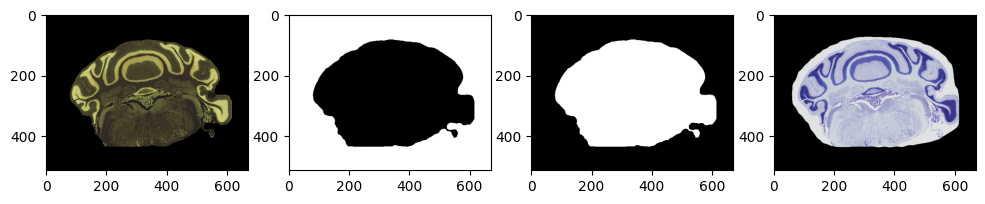

In [8]:
#drawn_img = cv2.cvtColor(img.copy(), cv2.COLOR_GRAY2BGR)  
#drawn_img = cv2.drawContours(drawn_img, data, -1, (255,0,0), 10)
images = [cleaned, thresh, thresh_i, img]
_, axs = plt.subplots(1, len(images), figsize=(12, 12))
axs = axs.flatten()
for image, ax in zip(images, axs):
    ax.imshow(image, cmap="gray")
plt.show()

In [9]:
def first_nonzero_index(array):
    """Return the index of the first non-zero element of array. If all elements are zero, return -1."""
    
    fnzi = -1 # first non-zero index
    indices = np.flatnonzero(array)
       
    if (len(indices) > 0):
        fnzi = indices[0]
        
    return fnzi

In [10]:
array = np.array([0,0,0,1,2,3,0,0])
array = img
nonzero_indx = np.argwhere(array).squeeze()
bottom = nonzero_indx[-1][0]
print(bottom)

439


In [13]:
src = new_img

gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY) # convert to grayscale

blur = cv2.blur(gray, (3, 3)) # blur the image

# Otsu's thresholding
th2 = cv2.adaptiveThreshold(blur,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
thresh = th2

contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# create hull array for convex hull points
hull = []

# calculate points for each contour
for i in range(len(contours)):
    # creating convex hull object for each contour
    hull.append(cv2.convexHull(contours[i], False))
# create an empty black image
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)

# draw contours and hull points
for i in range(len(contours)):
    color_contours = (0, 255, 0) # green - color for contours
    color = (255, 0, 0) # blue - color for convex hull
    # draw ith contour
    cv2.drawContours(drawing, contours, i, color_contours, 1, 8, hierarchy)
    # draw ith convex hull object

error: OpenCV(4.8.0) /io/opencv/modules/imgproc/src/color.simd_helpers.hpp:92: error: (-2:Unspecified error) in function 'cv::impl::{anonymous}::CvtHelper<VScn, VDcn, VDepth, sizePolicy>::CvtHelper(cv::InputArray, cv::OutputArray, int) [with VScn = cv::impl::{anonymous}::Set<3, 4>; VDcn = cv::impl::{anonymous}::Set<1>; VDepth = cv::impl::{anonymous}::Set<0, 2, 5>; cv::impl::{anonymous}::SizePolicy sizePolicy = cv::impl::<unnamed>::NONE; cv::InputArray = const cv::_InputArray&; cv::OutputArray = const cv::_OutputArray&]'
> Invalid number of channels in input image:
>     'VScn::contains(scn)'
> where
>     'scn' is 1


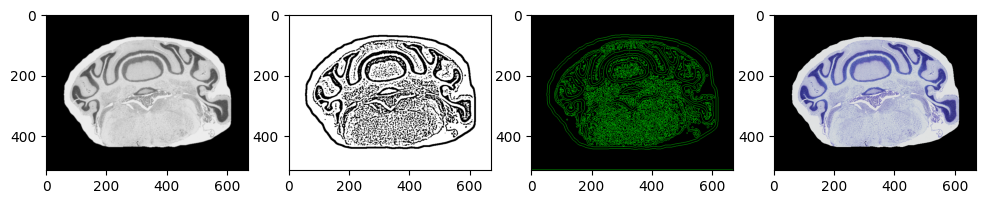

In [12]:
images = [blur, thresh, drawing, img]
_, axs = plt.subplots(1, len(images), figsize=(12, 12))
axs = axs.flatten()
for image, ax in zip(images, axs):
    ax.imshow(image, cmap="gray")
plt.show()